<a href="https://colab.research.google.com/github/sedici16/ATARI-GAME/blob/main/Copy_of_fulcra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analysis and Processing:**

We began our exploration with two datasets. The primary objective was to understand the relationship between various health metrics and blood glucose levels. Upon merging these datasets, we observed a significant amount of missing data. Through descriptive statistics, we gauged the extent of this missing data across various columns.

**Glucose Classification and Impact of Exercise:**

To lend structure to our analysis, blood glucose values were labeled into three categories using a dedicated algorithm, categorizing them as low, medium, or high. Our initial inclination was to incorporate exercise-related data, despite numerous 'NaN' values, primarily to maximize data volume for the subsequent modeling phase.

When this processed data was analyzed, a prominent pattern emerged: exercise appeared to be a dominant factor influencing glucose levels. This finding, while mirroring scientific consensus, emphasized the impact of physical activity on our body's glucose regulation.

**Modeling without Exercise Data:**

To further dissect the influence of other factors, we crafted a dataset that purposefully excluded exercise metrics. Given the scarcity of available data, the 'apple watch' column was retained, and the steps were capped at the average value of 14. Employing a Random Forest algorithm on this exercise-exempt data, we observed an accuracy metric of approximately 57%.

However, beneath this overarching metric lay a skewed picture. The model excelled at identifying high glucose levels but fumbled when tasked with distinguishing between low and medium glucose values. This hinted at a pronounced class imbalance in our dataset.

**Recommendations and Considerations:**

1. **Data Collection:** Our current dataset is limited. Sourcing data over more extended periods or from more significant cohorts can drastically enhance our analytical depth and the reliability of our findings.
   
2. **Data Augmentation and Synthetic Data:** Given the evident gaps and imbalances in the data, employing data augmentation techniques could be pivotal. Furthermore, synthetic datasets could be created and explored to bolster our modeling capabilities without waiting for extensive real-world data collection.
   
3. **Revisiting the Data Processing:** The presence of numerous 'NaN' values underscores the necessity to either source a more comprehensive dataset or adopt techniques to manage such missing values effectively, lest they skew our analysis and predictions.



In [ ]:
!pip install -U fulcra-api

In [ ]:
from fulcra_api.core import FulcraAPI

fulcra = FulcraAPI()

In [ ]:
fulcra.authorize()

In [ ]:
df = fulcra.time_series_grouped(
    start_time="2023-03-28 04:00:00.000Z",
    end_time="2023-09-27 04:00:00.000Z",
    metrics=["BloodGlucose",
        "DietaryProteinConsumed",
        "DietaryCarbohydratesConsumed",
        "DietarySugarConsumed",
        "DietaryFiberConsumed",
        "MonounsaturatedFatConsumed",
        "StepCount",
        "AppleWatchExerciseTime",
        # Add the "Location" metric if it has a specific name in the API
    ]
)


In [ ]:
df.head(10)

,blood_glucose,blood_glucose_src,dietary_protein_consumed,dietary_carbohydrates_consumed,dietary_sugar_consumed,dietary_fiber_consumed,monounsaturated_fat,step_count,apple_watch_exercise_time
time,,,,,,,,,
2023-03-28 04:00:00+00:00,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
2023-03-28 04:01:00+00:00,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
2023-03-28 04:02:00+00:00,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
2023-03-28 04:03:00+00:00,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
2023-03-28 04:04:00+00:00,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
2023-03-28 04:05:00+00:00,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
2023-03-28 04:06:00+00:00,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
2023-03-28 04:07:00+00:00,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
2023-03-28 04:08:00+00:00,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>


**summary**
1. **Blood Glucose**: 558 readings, averaging at 112.78 mg/dL, ranging from 70 to 193 mg/dL.
2. **Blood Glucose Source**: Two main sources, most frequent being '108881'.
3. **Dietary Protein**: 262,784 readings, mostly zeros, with a max of 144 grams.
4. **Dietary Carbohydrates**: Average of 0.075 grams, peaking at 479 grams.
5. **Step Count**: Averaging at 14 steps, with a max of 750 steps.
6. **Apple Watch Exercise Time**: 262,846 records, mostly zeros, with a max of 1.

Note: Other dietary components also have majority zeros, with some high max values.

In [ ]:
# Describe the dataset
description = df.describe()

print(description)

       blood_glucose  blood_glucose_src  dietary_protein_consumed  \
count          558.0              558.0             262784.000000   
mean       112.77957      186150.992832                  0.029821   
std         18.89249      113939.870465                  0.856326   
min             70.0           108881.0                  0.000000   
25%            101.0           108881.0                  0.000000   
50%            113.0           108881.0                  0.000000   
75%            125.0           353862.0                  0.000000   
max            193.0           353862.0                144.000000   

       dietary_carbohydrates_consumed  dietary_sugar_consumed  \
count                   262784.000000           262784.000000   
mean                         0.075474                0.017478   
std                          2.225413                1.093581   
min                          0.000000                0.000000   
25%                          0.000000                

In [ ]:
import pandas as pd

# Load the CSV into a DataFrame
df_foods = pd.read_csv("food-logs.csv")

# Drop the specified columns
df_foods = df_foods.drop(columns=['Name', 'Meal', 'Quantity', 'Units', 'Deleted', 'Icon'])

df_foods['Calories'] = pd.to_numeric(df_foods['Calories'], errors='coerce')
df_foods.dropna(subset=['Calories'], inplace=True)

# Display the first few rows to verify
print(df_foods.head())
print(df_foods.dtypes)


         Date  Calories  Fat (g)  Protein (g)  Carbohydrates (g)  \
0  03/28/2023     140.0    10.00          NaN               9.00   
1  03/28/2023     240.0     9.00        20.00              24.00   
2  03/28/2023     130.0     6.00         3.00              15.00   
3  03/28/2023     660.0    30.00        24.00              74.00   
4  03/29/2023      66.0     4.42         7.51               1.99   

   Saturated Fat (g)  Sugars (g)  Fiber (g)  Cholesterol (mg)  Sodium (mg)  
0                NaN         NaN       4.00               NaN          NaN  
1               0.00        0.00       2.00              0.00       520.00  
2               1.50        8.00       4.00              0.00        70.00  
3              10.00        4.00       6.00             80.00       940.00  
4               1.92        0.84       0.63             98.33       273.22  
Date                  object
Calories             float64
Fat (g)              float64
Protein (g)          float64
Carbohydrates

- **Entries (Rows)**: There are 1,246 recorded food items.
- **Date**: The meals span across 160 unique days with the date "09/03/2023" having the most entries (16 times).
- **Name of Food Item**: There are 220 distinct food names in this data. "Cacao + Cashew Butter granola" appears most frequently with 127 occurrences.
- **Icon**: Represented by 100 unique icons, with "Grain" being the most common (151 times).
- **Meal**: Meals are categorized into 5 unique types, with "Dinner" being the most frequent category (345 times).
- **Quantity**: On average, the quantity consumed is approximately 13.92 units, but this varies widely with a standard deviation of 43.17 units. The smallest quantity recorded is 0.25 units, and the largest is 330 units.

In summary, this dataset contains 1,246 entries of food consumption spread over 160 days, with "Dinner" being the most common meal and "Cacao + Cashew Butter granola" being the most frequently consumed item.

In [ ]:
description_food1 = df_foods.describe(include='all')

print(description_food1)


              Date     Calories      Fat (g)  Protein (g)  Carbohydrates (g)  \
count         1242  1242.000000  1184.000000  1128.000000        1220.000000   
unique         160          NaN          NaN          NaN                NaN   
top     09/03/2023          NaN          NaN          NaN                NaN   
freq            16          NaN          NaN          NaN                NaN   
mean           NaN   278.964573    14.189164    13.329043          29.307639   
std            NaN   183.694616    12.738898    10.423031          27.297857   
min            NaN     7.000000     0.000000     0.000000           0.000000   
25%            NaN   143.000000     4.420000     6.000000          14.075000   
50%            NaN   240.000000    10.000000    10.000000          26.000000   
75%            NaN   350.000000    20.000000    20.000000          36.000000   
max            NaN   895.000000    68.000000    58.300000         479.000000   

        Saturated Fat (g)   Sugars (g) 

In [ ]:
#checking the lenghts of the 2 dataset for merging
#they have different lenghts
length_df = len(df)
length_df_foods = len(df_foods)

print(f"Number of rows in df: {length_df}")
print(f"Number of rows in df_foods: {length_df_foods}")

Number of rows in df: 263520
Number of rows in df_foods: 1242


**Merging the data sets with left Merge**

A left merge using two dataframes (`df` from "Context App Data Service" and `df_foods` from "food-logs.csv") will retain all the rows from the left dataframe (`df` in this case) and match them with any corresponding rows from the right dataframe (`df_foods`). If there's no matching date in `df_foods` for a particular date in `df`, the columns from `df_foods` in the merged dataframe will be filled with NaN values.

In simpler terms:
- You'll keep all dates from `df`.
- For dates that also exist in `df_foods`, you'll see data from both `df` and `df_foods` side by side.
- For dates in `df` that don't have a match in `df_foods`, the columns specific to `df_foods` will show NaN, indicating missing data.

Given that `df_foods` has fewer rows, this means there will be several dates in the merged dataframe where the columns from `df_foods` will have NaN values due to the lack of matching data.

In [ ]:
# Convert to timezone-naive datetime for df
df.index = df.index.tz_localize(None)

# Convert the 'Date' column in df_foods to datetime format
df_foods['Date'] = pd.to_datetime(df_foods['Date'])

# Convert to timezone-naive datetime for df_foods
df_foods['Date'] = df_foods['Date'].dt.tz_localize(None)

# Perform the merge
result_df = pd.merge(df, df_foods, left_index=True, right_on='Date', how='left')

# Set the index to 'Date'
result_df.set_index('Date', inplace=True)

# Display the first few rows
result_df.head()



,blood_glucose,blood_glucose_src,dietary_protein_consumed,dietary_carbohydrates_consumed,dietary_sugar_consumed,dietary_fiber_consumed,monounsaturated_fat,step_count,apple_watch_exercise_time,Calories,Fat (g),Protein (g),Carbohydrates (g),Saturated Fat (g),Sugars (g),Fiber (g),Cholesterol (mg),Sodium (mg)
Date,,,,,,,,,,,,,,,,,,
2023-03-28 04:00:00,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-28 04:01:00,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-28 04:02:00,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-28 04:03:00,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-28 04:04:00,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



**Data Briefing**:

1. **Blood Glucose**: 558 measurements taken, with an average level of 112.78.
2. **Dietary & Physical Metrics**:
   - Dietary data (protein, carbs, sugar, fiber) recorded 263,867 times.
   - Average step count is 14, with a max of 750.
3. **Food Log Details**:
   - 1,242 entries; 220 unique food items.
   - Most frequent item: "Cacao + Cashew Butter granola" (127 times).
   - Nutritional Averages:
     - Fats: 14.27g
     - Proteins: 13.53g
     - Carbs: 29.84g
     - Sugars: 7g
     - Fiber: 5.28g
4. **Other Nutritional Metrics**: Data on saturated fats, cholesterol (up to 558 mg), and sodium (with a high of 7,200 mg) is also available.

---

The dataset provides a comprehensive view of dietary patterns, with a detailed breakdown of food items and their nutritional components.

In [ ]:
description2 = result_df.describe(include='all')

print (description2)


       blood_glucose  blood_glucose_src  dietary_protein_consumed  \
count          558.0              558.0             263863.000000   
mean       112.77957      186150.992832                  0.031462   
std         18.89249      113939.870465                  0.890799   
min             70.0           108881.0                  0.000000   
25%            101.0           108881.0                  0.000000   
50%            113.0           108881.0                  0.000000   
75%            125.0           353862.0                  0.000000   
max            193.0           353862.0                144.000000   

       dietary_carbohydrates_consumed  dietary_sugar_consumed  \
count                   263863.000000           263863.000000   
mean                         0.079129                0.017716   
std                          2.294430                1.092267   
min                          0.000000                0.000000   
25%                          0.000000                

1. **Data Type Conversion**:
    The `blood_glucose` column from the `result_df` DataFrame is converted to the `float` data type. This is crucial because subsequent mathematical operations and comparisons will require the data to be in a numerical format.

2. **Handling Missing Values**:
    Any missing values in the `blood_glucose` column are interpolated. Interpolation is a method of estimating values between two known values. In the context of a DataFrame, it often fills missing data points based on neighboring values, providing a more consistent dataset.

3. **Average Glucose Computation**:
    After interpolation, the average (mean) of the `blood_glucose` column is recomputed to obtain the `avg_glucose` value.

4. **Glucose Labeling Function**:
    The `label_glucose_level` function is defined to categorize blood glucose levels. The classification is based on the computed average glucose:
   - **Low**: Any value less than the average glucose minus 10 is labeled as "Low."
   - **Normal**: Values that lie within a range of 10% above or below the average glucose are labeled as "Normal."
   - **High**: Any other value (that doesn't fall into the previous two categories) is labeled as "High."

5. **Applying the Labeling Function**:
    The `apply` method, combined with a lambda function, is used to apply the `label_glucose_level` function to each row in the `blood_glucose` column. This results in a new column, `new_glucose_label`, which contains the categorized labels.

6. **Count of Each Label**:
    Finally, the code displays the counts of each label (Low, Normal, High) present in the `new_glucose_label` column using the `value_counts` method. This provides a quick overview of the distribution of glucose levels in the dataset.



In [ ]:

# Convert blood_glucose column to float dtype
result_df['blood_glucose'] = result_df['blood_glucose'].astype(float)

# Interpolate missing values of blood_glucose
result_df['blood_glucose'] = result_df['blood_glucose'].interpolate()

# Recompute the average glucose after interpolation
avg_glucose = result_df['blood_glucose'].mean()

print ('average glucose', avg_glucose)

def label_glucose_level(value, avg_glucose):#this labels the glucose level
    if value < (avg_glucose - 10):
        return "Low"
    elif (avg_glucose - 0.10 * avg_glucose) <= value <= (avg_glucose + 0.10 * avg_glucose):
        return "Normal"
    else:
        return "High"

# Create a new glucose label column based on the updated blood glucose values
result_df['new_glucose_label'] = result_df['blood_glucose'].apply(lambda x: label_glucose_level(x, avg_glucose))

label_counts = result_df['new_glucose_label'].value_counts()
print(label_counts)


average glucose 121.7489507372175
Normal    149716
High       62030
Low        52853
Name: new_glucose_label, dtype: int64


In [ ]:
result_df

,blood_glucose,blood_glucose_src,dietary_protein_consumed,dietary_carbohydrates_consumed,dietary_sugar_consumed,dietary_fiber_consumed,monounsaturated_fat,step_count,apple_watch_exercise_time,Calories,Fat (g),Protein (g),Carbohydrates (g),Saturated Fat (g),Sugars (g),Fiber (g),Cholesterol (mg),Sodium (mg),new_glucose_label
Date,,,,,,,,,,,,,,,,,,,
2023-03-28 04:00:00,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
2023-03-28 04:01:00,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
2023-03-28 04:02:00,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
2023-03-28 04:03:00,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
2023-03-28 04:04:00,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-27 03:55:00,146.0,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
2023-09-27 03:56:00,146.0,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
2023-09-27 03:57:00,146.0,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High


This Models incluses the exercise data, I have done beacuse of the amount of NaN data in the data set, so I did not want to reduce the data set too much.

The code segment below shows: the process of preparing the `result_df` data for machine learning, training a Random Forest Classifier, evaluating its performance, and analyzing the importance of various features in determining glucose levels.

Here's a breakdown:

1. **Importing Necessary Libraries**:
    - Essential libraries and modules like `RandomForestClassifier`, `train_test_split`, `accuracy_score`, and `LabelEncoder` are imported from the scikit-learn library.

2. **Data Preparation**:
    - The target variable, `new_glucose_label`, is encoded into numerical values using `LabelEncoder` for modeling.
    - The encoded target variable is stored in `y`, and then the associated original column, alongside other specified columns, is dropped from the DataFrame to prepare the feature matrix `X`.
  
3. **Data Splitting**:
    - The data is split into training and test sets with an 80-20 ratio using the `train_test_split` function. A random state of 42 is set for reproducibility.

4. **Handling Missing Values**:
    - Any missing values in the training and test datasets are replaced with the median of the respective columns using the `fillna` method. Using the median is a robust method, especially when outliers are present.

5. **Model Training**:
    - A Random Forest Classifier is trained on the training data. Again, a random state of 42 ensures the results are reproducible.

6. **Evaluation**:
    - The trained classifier is used to make predictions on the test set. The accuracy of these predictions is then calculated, with the model achieving an accuracy of approximately 56.46%.

7. **Feature Importance Analysis**:
    - The importance of each feature in predicting the target variable is extracted from the Random Forest model. The features are then sorted in descending order based on their importance.
    - From the listed features, it is evident that dietary aspects like carbohydrates consumed, protein consumed, and dietary fiber are the top three influencers on glucose levels, according to this model. At the bottom, `monounsaturated_fat` has zero importance, meaning it did not play a role in the model's decisions.

**Findings and Comments**:
- The Random Forest model achieves a moderate accuracy of approximately 56.46%. There might be room for improvement with more advanced preprocessing, feature engineering, or hyperparameter tuning.
- Dietary habits seem to significantly influence glucose levels. Specifically, the amount of carbohydrates, protein, and fiber consumed appear to be major factors.
- It's interesting to note that both `dietary_carbohydrates_consumed` and `Carbohydrates (g)` are in the top features. This might indicate redundancy in the data, and there could be potential multicollinearity.
- On the contrary, the `monounsaturated_fat` feature seems to have no impact on the glucose level prediction, at least within the context of this model.

In conclusion, while the model offers insights into potential dietary factors influencing glucose levels, further refinement and data analysis might enhance its predictive capabilities.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encoding target variable
le = LabelEncoder()
result_df['new_glucose_label'] = le.fit_transform(result_df['new_glucose_label'])

# Define target variable y before dropping columns
y = result_df['new_glucose_label']

# Drop columns from result_df
result_df = result_df.drop(columns=['blood_glucose', 'new_glucose_label','step_count', 'blood_glucose_src', 'apple_watch_exercise_time'])
X = result_df.copy()

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # added random state for reproducibility

# Handling missing values using median
X_train = X_train.fillna(X_train.median(numeric_only=True))
X_test = X_test.fillna(X_train.median(numeric_only=True))

# Training Random Forest
clf = RandomForestClassifier(random_state=42)  # added random state for reproducibility
clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature Importance
features = X.columns
importances = clf.feature_importances_
sorted_importances = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")


Accuracy: 0.5645502645502646
dietary_carbohydrates_consumed: 0.1365571778906256
dietary_protein_consumed: 0.12905949171250392
dietary_fiber_consumed: 0.10218980006736796
dietary_sugar_consumed: 0.0997039081067612
Calories: 0.07036810090613649
Protein (g): 0.06902476903387199
Carbohydrates (g): 0.06687866914815033
Fat (g): 0.06649109844868986
Sodium (mg): 0.0653332853349268
Saturated Fat (g): 0.05563776771061727
Sugars (g): 0.055594781776641324
Fiber (g): 0.05263094217325939
Cholesterol (mg): 0.03053020769044785
monounsaturated_fat: 0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def prepare_data(df):
    # Encoding, dropping columns, etc.
    le = LabelEncoder()
    df['new_glucose_label'] = le.fit_transform(df['new_glucose_label'])
    y = df['new_glucose_label']
    X = df.drop(columns=['blood_glucose', 'new_glucose_label','step_count', 'blood_glucose_src', 'apple_watch_exercise_time'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = X_train.fillna(X_train.median(numeric_only=True))
    X_test = X_test.fillna(X_train.median(numeric_only=True))
    return X_train, X_test, y_train, y_test

def train_and_evaluate(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    features = X_train.columns
    importances = clf.feature_importances_
    sorted_importances = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)
    for feature, importance in sorted_importances:
        print(f"{feature}: {importance}")

X_train, X_test, y_train, y_test = prepare_data(result_df.copy())  # using a copy to keep the original dataframe unchanged
train_and_evaluate(X_train, X_test, y_train, y_test)


Accuracy: 0.5645502645502646
dietary_carbohydrates_consumed: 0.1365571778906256
dietary_protein_consumed: 0.12905949171250392
dietary_fiber_consumed: 0.10218980006736796
dietary_sugar_consumed: 0.0997039081067612
Calories: 0.07036810090613649
Protein (g): 0.06902476903387199
Carbohydrates (g): 0.06687866914815033
Fat (g): 0.06649109844868986
Sodium (mg): 0.0653332853349268
Saturated Fat (g): 0.05563776771061727
Sugars (g): 0.055594781776641324
Fiber (g): 0.05263094217325939
Cholesterol (mg): 0.03053020769044785
monounsaturated_fat: 0.0


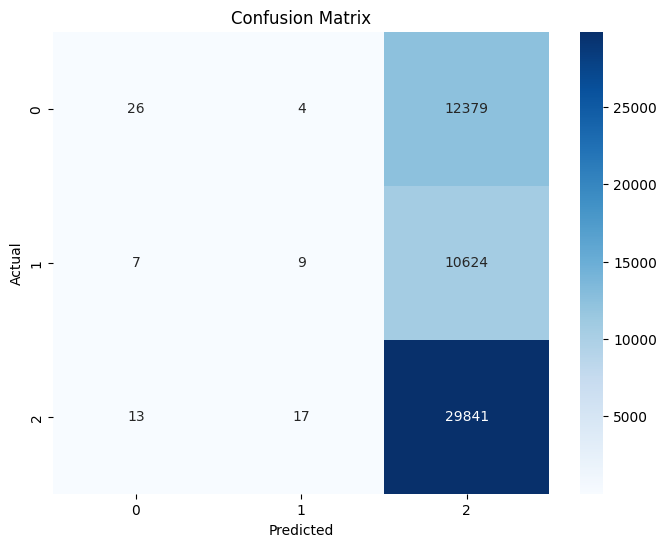

              precision    recall  f1-score   support

        High       0.57      0.00      0.00     12409
         Low       0.30      0.00      0.00     10640
      Normal       0.56      1.00      0.72     29871

    accuracy                           0.56     52920
   macro avg       0.48      0.33      0.24     52920
weighted avg       0.51      0.56      0.41     52920



In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Precision, Recall, F1-score
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Metrics:

High:

Precision: 0.57 suggests that when the model predicts "High", it's correct about 57% of the time.
Recall: 0.00 means that out of all actual "High" instances, the model hardly recognizes any of them. This is concerning.
F1-score: 0.00 is a harmonic mean of precision and recall, and this low value indicates a poor performance for the "High" class.
Low:

Precision: 0.30 suggests a low reliability in its "Low" predictions.
Recall: 0.00 indicates it almost never correctly identifies actual "Low" instances.
F1-score: 0.00 again indicates poor performance for the "Low" class.
Normal:

Precision: 0.56 means when the model predicts "Normal", it's correct 56% of the time.
Recall: 1.00 suggests the model identifies almost all "Normal" instances correctly.
F1-score: 0.72 is relatively good compared to other classes.

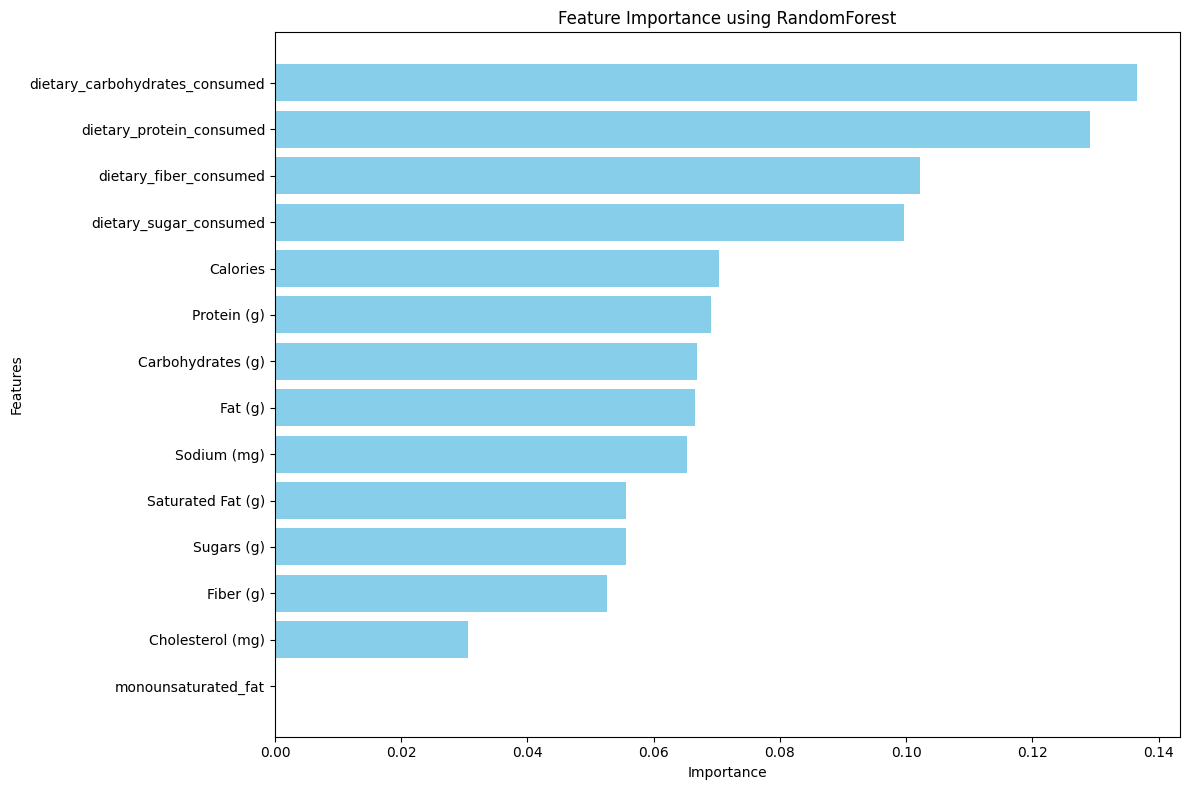

In [ ]:
import matplotlib.pyplot as plt

# Unzipping the feature names and their importance values from your RandomForest model results
features, importance_values = zip(*sorted_importances)

plt.figure(figsize=(12, 8))
plt.barh(features, importance_values, align='center', color='skyblue')  # Added color for aesthetics
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance using RandomForest')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()  # Adjust layout for better visualization
plt.show()


The feature importance chart reveals which attributes or variables most influence the prediction of the glucose label classes. In essence, these importances signify how significant each feature is in making accurate predictions.

For instance:

dietary_carbohydrates_consumed: This feature has the highest importance, indicating that the amount of carbohydrates consumed plays a crucial role in predicting the glucose label.

dietary_protein_consumed: Protein consumption also holds significant weight in predictions, being the second most crucial feature.

dietary_fiber_consumed and dietary_sugar_consumed: Dietary fibers and sugars also impact glucose levels. These features, being the third and fourth most influential, respectively, suggest that their intake levels are pivotal for predicting blood glucose conditions.

On the other hand, monounsaturated_fat has an importance of 0.0, meaning it did not play any discernible role in the model's predictions.

The model's accuracy stands at approximately 56.45%. This indicates that the model correctly predicts the glucose label for about 56.45% of the test instances. Given the features available and the complexity of predicting glucose levels, there's scope for further model optimization or exploration of additional relevant features.

**Xboost**

The code implements the XGBoost algorithm to predict glucose levels. After preparing and encoding the data, unnecessary columns are removed. The data is then split into training and test sets, with missing values filled using the median. An XGBoost classifier is trained on the dataset, achieving an accuracy that's printed out. Finally, the importance of each feature used in prediction is ranked and displayed. The switch to XGBoost represents an exploration to potentially achieve better accuracy compared to previous models.

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming result_df is already loaded and processed as per your provided code

# Encoding target variable
le = LabelEncoder()
if 'new_glucose_label' in result_df.columns:
    result_df['new_glucose_label'] = le.fit_transform(result_df['new_glucose_label'])

# Define target variable y before dropping columns
y = result_df['new_glucose_label']

# Drop columns from result_df
columns_to_drop = ['blood_glucose', 'new_glucose_label', 'blood_glucose_src', 'step_count', 'apple_watch_exercise_time']
for col in columns_to_drop:
    if col in result_df.columns:
        result_df = result_df.drop(columns=col)

X = result_df.copy()

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling missing values using median
X_train = X_train.fillna(X_train.median(numeric_only=True))
X_test = X_test.fillna(X_train.median(numeric_only=True))

# Training XGBoost
clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False)
clf.fit(X_train, y_train, eval_metric='logloss')  # Specified eval_metric to suppress warning

# Predictions and Evaluation
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature Importance
features = X.columns
importances = clf.feature_importances_
sorted_importances = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.5646825396825397
Sugars (g): 0.09700902551412582
Sodium (mg): 0.08720340579748154
Fat (g): 0.08554940670728683
dietary_carbohydrates_consumed: 0.08193077147006989
Protein (g): 0.0812835767865181
Cholesterol (mg): 0.08046849071979523
dietary_protein_consumed: 0.07824041694402695
Fiber (g): 0.07708679139614105
dietary_fiber_consumed: 0.07403912395238876
Saturated Fat (g): 0.06851798295974731
Carbohydrates (g): 0.06746110320091248
dietary_sugar_consumed: 0.06648791581392288
Calories: 0.054721981287002563
monounsaturated_fat: 0.0


In [ ]:

# Print out 'step_count' column
print(result_df['step_count'])

# Print out the first 5 rows of 'step_count'
print(result_df['step_count'].head())

# Describe 'step_count' column
print(result_df['step_count'].describe())


Date
2023-03-28 04:00:00    <NA>
2023-03-28 04:01:00    <NA>
2023-03-28 04:02:00    <NA>
2023-03-28 04:03:00    <NA>
2023-03-28 04:04:00    <NA>
                       ... 
2023-09-27 03:55:00    <NA>
2023-09-27 03:56:00    <NA>
2023-09-27 03:57:00    <NA>
2023-09-27 03:58:00    <NA>
2023-09-27 03:59:00    <NA>
Name: step_count, Length: 264599, dtype: Float64
Date
2023-03-28 04:00:00    <NA>
2023-03-28 04:01:00    <NA>
2023-03-28 04:02:00    <NA>
2023-03-28 04:03:00    <NA>
2023-03-28 04:04:00    <NA>
Name: step_count, dtype: Float64
count     264536.0
mean     14.062022
std      29.104146
min            0.0
25%            0.0
50%            0.0
75%      13.846154
max          750.0
Name: step_count, dtype: Float64


**Filtered out Exercise**

The script begins by defining a function `filter_steps` which is responsible for filtering the original dataframe based on the `step_count` and the value of `apple_watch_exercise_time`. It then drops the columns used for filtering and returns the filtered dataframe. The average steps in the dataset are 14. Using this function, the data is narrowed down to observations with steps ranging from 0 to 14.

Subsequently, the `no_exercise` dataframe, which now represents a subset of the data without exercise influence, is processed and split into training and test sets. The target variable (`new_glucose_label`) is encoded.

A Random Forest classifier is then trained on this `no_exercise` data. After training, predictions are made on the test set, and the accuracy is printed. The classifier's feature importances are also extracted and displayed, helping identify which features are most influential in predicting glucose levels in the absence of exercise.

In [ ]:
def filter_steps(df, n_steps, include_watch=1):
    """
    Filters the dataframe to only include rows where 'step_count' is less than or equal to n_steps
    and, based on the user's choice, where 'apple_watch_exercise_time' is not equal to 1. It then drops these columns.

    Parameters:
    - df: the dataframe to be filtered
    - n_steps: the maximum step count to be included
    - include_watch: if set to 0, rows where 'apple_watch_exercise_time' is equal to 1 are excluded; if set to 1, they are included

    Returns:
    - no_exercise_df: a dataframe with filtered rows
    """

    if include_watch == 0:
        no_exercise_df = df[(df['step_count'] <= n_steps) & (df['apple_watch_exercise_time'] != 1)]
    else:
        no_exercise_df = df[df['step_count'] <= n_steps]

    # Drop the 'step_count' and 'apple_watch_exercise_time' columns
    no_exercise_df = no_exercise_df.drop(['step_count', 'apple_watch_exercise_time'], axis=1)

    # Describe the resulting dataframe
    print(no_exercise_df.describe())

    return no_exercise_df

# Usage
# If you want to exclude rows where apple_watch_exercise_time is 1
#no_exercise = filter_steps(result_df, 10, 0)

# If you want to include all rows regardless of the value of apple_watch_exercise_time
#mean steps is 14, better leave the apple wath data included
no_exercise = filter_steps(result_df, 14, 1)#the steps will work from zero to 14, then the data becomes too thin to make a model


       blood_glucose  blood_glucose_src  dietary_protein_consumed  \
count  177487.000000              468.0             198352.000000   
mean      121.882159       183212.84188                  0.032904   
std        12.096353       112746.74392                  0.939249   
min        70.000000           108881.0                  0.000000   
25%       113.022308           108881.0                  0.000000   
50%       121.283517           108881.0                  0.000000   
75%       129.700075           353862.0                  0.000000   
max       191.200000           353862.0                144.000000   

       dietary_carbohydrates_consumed  dietary_sugar_consumed  \
count                   198352.000000           198352.000000   
mean                         0.081657                0.016860   
std                          2.391315                0.903603   
min                          0.000000                0.000000   
25%                          0.000000                

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# 2. Split the no_exercise DataFrame
le = LabelEncoder()
no_exercise['new_glucose_label'] = le.fit_transform(no_exercise['new_glucose_label'])
y_no_exercise = no_exercise['new_glucose_label']
X_no_exercise = no_exercise.drop(columns=['blood_glucose', 'new_glucose_label', 'blood_glucose_src']) # 'dietary_protein_consumed', 'blood_glucose_src', 'dietary_carbohydrates_consumed', 'dietary_sugar_consumed','dietary_fiber_consumed']

# 3. Follow the pipeline

# Splitting the dataset
X_train_no_exercise, X_test_no_exercise, y_train_no_exercise, y_test_no_exercise = train_test_split(X_no_exercise, y_no_exercise, test_size=0.2, random_state=42)


# Handling missing values using median
X_train_no_exercise = X_train_no_exercise.fillna(X_train_no_exercise.median(numeric_only=True))
X_test_no_exercise = X_test_no_exercise.fillna(X_train_no_exercise.median(numeric_only=True))

# Training Random Forest on no_exercise data
clf_no_exercise = RandomForestClassifier(random_state=42)
clf_no_exercise.fit(X_train_no_exercise, y_train_no_exercise)

# Predictions and Evaluation
y_pred_no_exercise = clf_no_exercise.predict(X_test_no_exercise)
print("Accuracy on no_exercise data:", accuracy_score(y_test_no_exercise, y_pred_no_exercise))

# Feature Importance for no_exercise data
features_no_exercise = X_no_exercise.columns
importances_no_exercise = clf_no_exercise.feature_importances_
sorted_importances_no_exercise = sorted(zip(features_no_exercise, importances_no_exercise), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importances_no_exercise:
    print(f"{feature}: {importance}")

Accuracy on no_exercise data: 0.5684268730992535
dietary_protein_consumed: 0.12421734389845503
dietary_carbohydrates_consumed: 0.12145020213955103
dietary_fiber_consumed: 0.09714606402332687
dietary_sugar_consumed: 0.08843564685893189
Fat (g): 0.07446753192169678
Carbohydrates (g): 0.07231341806254171
Calories: 0.07187116826777398
Sodium (mg): 0.07107080287337873
Protein (g): 0.06688492018956094
Sugars (g): 0.06172470364928419
Fiber (g): 0.058988794382376246
Saturated Fat (g): 0.05610578867510708
Cholesterol (mg): 0.03532361505801567
monounsaturated_fat: 0.0


In [ ]:
import pandas as pd

def predict_glucose_level(features_input):
    """
    Predicts the glucose level given a set of features.

    Parameters:
    - features_input (dict): A dictionary where the keys are the feature names and the values are the corresponding feature values.

    Returns:
    - str: The predicted glucose level label ('High', 'Normal', or 'Low').
    """

    # Convert the input dictionary to a DataFrame
    input_df = pd.DataFrame([features_input])

    # Reorder columns of input_df to match the training data
    input_df = input_df[X_train_no_exercise.columns]

    # Handle missing values if any using the median values from X_train_no_exercise
    input_df = input_df.fillna(X_train_no_exercise.median(numeric_only=True))

    # Make a prediction
    prediction = clf_no_exercise.predict(input_df)

    # Convert the prediction to its string representation
    label_map = {
        0: "Low",
        1: "Medium",
        2: "High"
    }

    label = label_map[prediction[0]]

    return label

# Example usage:
features_input = {
    'dietary_protein_consumed': 0.5,  # Approximated from apple
    'Calories': 95,  # Approximated from apple
    'Protein (g)': 0.5,  # Approximated from apple
    'dietary_carbohydrates_consumed': 25,  # Approximated from apple
    'dietary_fiber_consumed': 4,  # Approximated from apple
    'dietary_sugar_consumed': 19,  # Approximated from apple
    'Fat (g)': 0.3,  # Approximated from apple
    'Sodium (mg)': 2,  # Approximated from apple
    'Saturated Fat (g)': 0.1,  # Almost negligible, but we'll include it
    'Sugars (g)': 19,  # Approximated from apple
    'Fiber (g)': 4,  # Approximated from apple
    'Cholesterol (mg)': 0,  # Apples don't contain cholesterol
    'monounsaturated_fat': 0.1,  # Estimate; not typically specified for apples but they have a small amount of various fats
    'Carbohydrates (g)': 25  # Approximated from apple
}



predicted_label = predict_glucose_level(features_input)
print(f"The predicted glucose level is: {predicted_label}")


The predicted glucose level is: High


Explanation on Model's Performance Issues

The model's inability to generate accurate predictions can be attributed to a couple of significant issues:

Data Imbalance: A prominent challenge arises from the imbalance in the dataset. When one class (e.g., 'High') is over-represented compared to others, the model tends to be biased towards predicting that over-represented class. As a result, even when presented with feature values that should lead to different class predictions, the model might still predict the dominant class because it has "learned" to do so from the skewed training data. This data imbalance makes it difficult for the model to learn the nuanced patterns that differentiate between classes, especially for under-represented ones.

Redundant Features: Additionally, there are repeated or very similar features in the dataset, such as dietary_protein_consumed and Protein (g). Without a clear distinction between what each of these features represents, it introduces redundancy in the feature space. This can lead to multicollinearity issues, where two or more variables are highly correlated, causing inefficiencies and potential overfitting. Redundant features can confuse the model and make it harder to ascertain which features are truly important for predictions.

In summary, for the model to predict more effectively, it's essential to address the data imbalance and clarify or eliminate redundant features. It would involve reprocessing the data and potentially retraining the model using refined datasets.

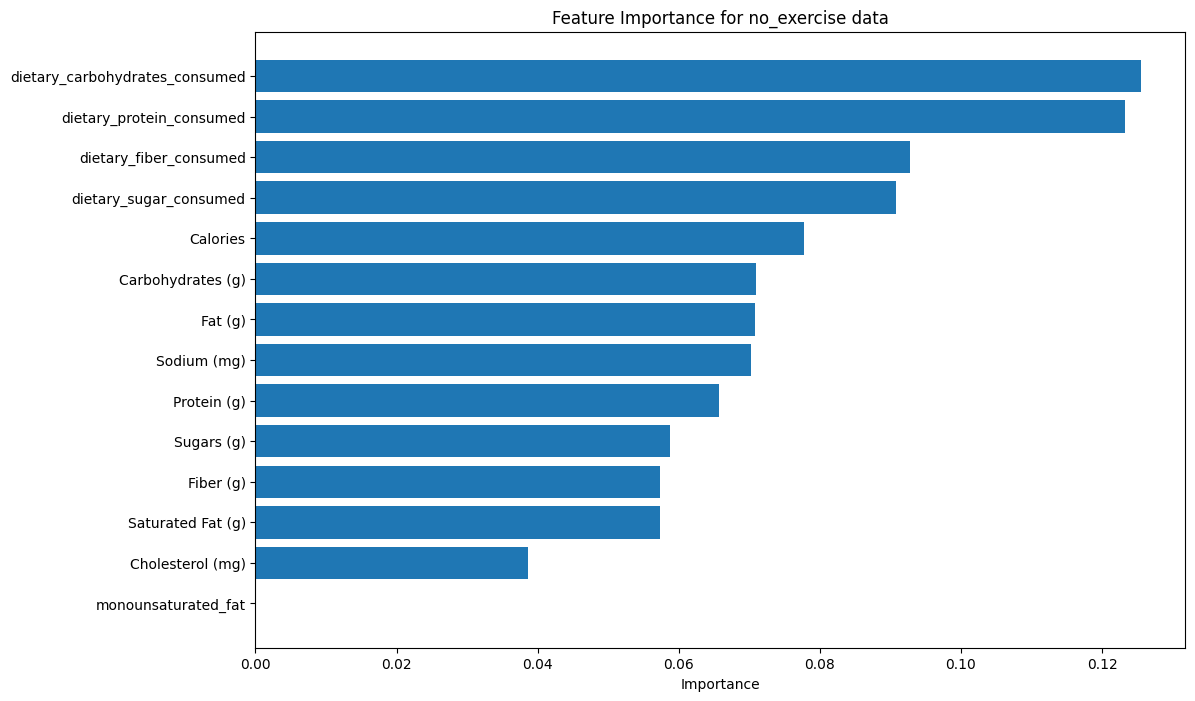

In [ ]:
import matplotlib.pyplot as plt

# 1. Plotting Feature Importance
features, importance_values = zip(*sorted_importances_no_exercise)  # Unzipping the feature names and their importance values
plt.figure(figsize=(12, 8))
plt.barh(features, importance_values, align='center')
plt.xlabel('Importance')
plt.title('Feature Importance for no_exercise data')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


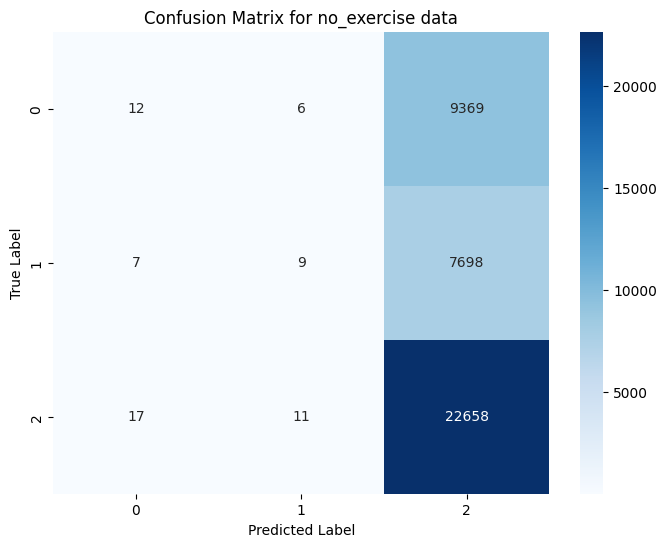

              precision    recall  f1-score   support

           0       0.33      0.00      0.00      9387
           1       0.35      0.00      0.00      7714
           2       0.57      1.00      0.73     22686

    accuracy                           0.57     39787
   macro avg       0.42      0.33      0.24     39787
weighted avg       0.47      0.57      0.42     39787



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 2. Plotting Confusion Matrix
matrix = confusion_matrix(y_test_no_exercise, y_pred_no_exercise)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for no_exercise data')
plt.show()

# Printing classification report which includes precision, recall, and F1-score
print(classification_report(y_test_no_exercise, y_pred_no_exercise))


Summary of Model Performance and Recommendations:

The model's performance evaluation indicates a significant skew towards predicting the "High blood glucose" class (Class 2). While it exhibits a commendable prediction accuracy for this class, it falls short in effectively predicting the other two classes. This behavior highlights a classic case of class imbalance in the dataset, where the over-represented class tends to dominate the model's predictions.

Addressing class imbalance is critical as relying on a model with such skew can lead to misleading results and undermine the objective of having a balanced and nuanced prediction across all classes. Potential solutions include data-level interventions like oversampling the minority class or undersampling the majority class, using synthetic data generation techniques.

Data Collection: The organization should invest in gathering more data, especially for the underrepresented classes. This would not only address the class imbalance but also reduce the impact of missing values, leading to a more robust dataset.

In conclusion, to improve the model's utility and reliability, addressing the class imbalance is of paramount importance. This will ensure that the predictions are well-rounded and representative of all classes, providing more actionable insights.